## Advanced Classification Project

 ### Lesego Tiro

<a id="cont"></a>

## Table of Contents

<a href=#one1>1. introduction</a>

<a href=#onei>2. Problem statement</a>

<a href=#one>3. Importing Packages</a>


<a href=#two>4. Loading Data</a>

<a href=#three>5. Exploratory Data Analysis (EDA)</a>

<a href=#four>6. Data Engineering</a>


<a href=#five>7. Modelling</a>

<a href=#six>8. Model Perfomance</a>

<a href=#seven>9. Model Explanations</a>

<a href=#threefiv>10. Conclusion</a>

<a href=#threefi>11. References</a>

<a href=#threef>12. kaggle Submissions</a>

### Honor Code

I {Lesego Tiro}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract

<a id="one1"></a>
## 1. Introduction

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="onei"></a>
## 2.  Problem Statement

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

 <a id="one"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
# utilities
import re
import numpy as np
import pandas as pd
import string
import urllib
import matplotlib.pyplot as plt
# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
##from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from comet_ml import Experiment

<a id="two"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
# Load the train and test data

df_train = pd.read_csv('train_set.csv')
df_test= pd.read_csv('test_set.csv')

In [40]:
df_train.head(20)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [41]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


<a id="three"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them

In [28]:
# Columns of the dataset
df_train.columns

Index(['lang_id', 'text'], dtype='object')

In [29]:
# Shape of data Set
df_train.shape

(33000, 2)

In [30]:
# total number of entries in dataset
df_train.size

66000

In [31]:
#unique values in columns
df_train.nunique()

lang_id       11
text       29948
dtype: int64

In [32]:
#Data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [33]:
# Nullvalues present in each column
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

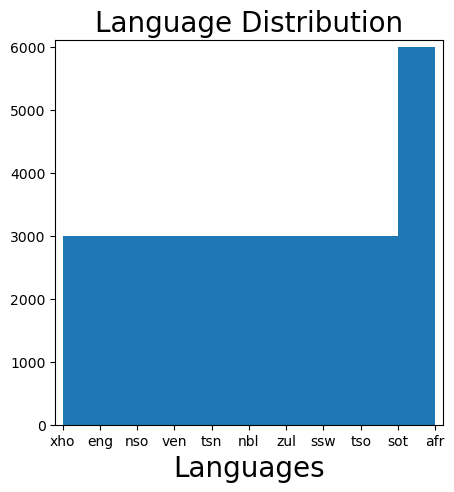

In [63]:
plt.figure(figsize=(5,5))
plt.margins(0.02)
plt.xlabel('Languages', fontsize=20)
plt.xticks(fontsize=10)
#plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=10)
plt.hist(df_train['lang_id'], bins=10)
plt.title('Language Distribution', fontsize=20)
plt.show()

<AxesSubplot:>

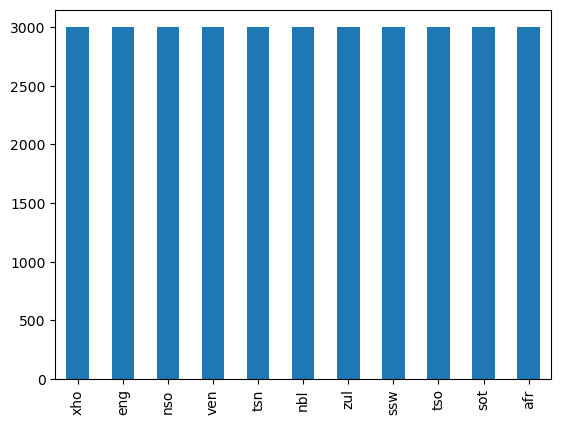

In [42]:
df_train['lang_id'].value_counts().plot(kind='bar')


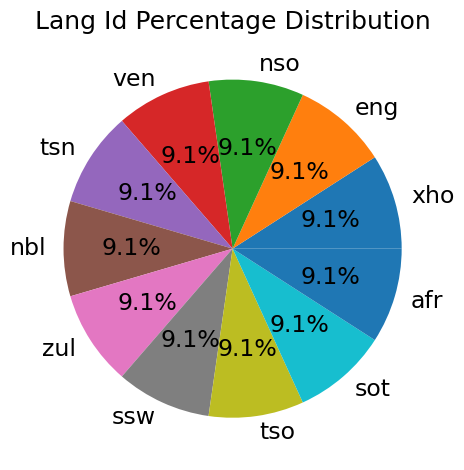

In [45]:
# Visualising the percentage distribution of sentiments
plt.pie(df_train.lang_id.value_counts().values, 
        labels = df_train.lang_id.value_counts().index, 
        autopct = '%2.1f%%', textprops={'fontsize': 17})
plt.title('Language Id Percentage Distribution', fontsize=18)
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

<a id="four"></a>
## 6. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="five"></a>
## 7. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
## 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 9. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="threefiv"></a>

## 10. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a><a id="threefiv"></a>